In [69]:
import os
import dotenv
import sqlalchemy
import pandas as pd


dotenv.load_dotenv()
# username = os.getenv("username")
username = "studente_dapt"
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname

db_engine = sqlalchemy.create_engine(conn_string)

query = "SELECT * FROM dimproduct"
dp = pd.read_sql(query, db_engine)

dp.DealerPrice.round(2)
intero = dp.DealerPrice.round()
comp = dp.DealerPrice.clip(lower=0, upper=1000)

<Axes: >

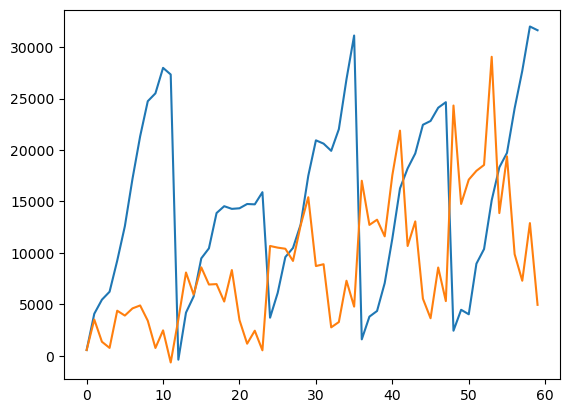

In [210]:
import numpy as np
years = 5 
a = pd.DataFrame({"Mese": list("GFMAMGLASOND"*years), 
                  "Anno": np.repeat(list(range(years)), 12), 
                  "Guadagni": np.random.randint(-800, 5000, 12*years)})

mese = a.groupby("Mese")["Guadagni"].sum()
anno = a.groupby("Anno")["Guadagni"].sum()
cs = a.Guadagni.cumsum()
mth_cum =  a.groupby("Mese").Guadagni.cumsum() 
yr_cum =  a.groupby("Anno").Guadagni.cumsum() 
yr_cum.plot()
mth_cum.plot()

In [289]:
import os
import dotenv
import sqlalchemy
import pandas as pd


dotenv.load_dotenv()
# username = os.getenv("username")
username = "studente_dapt"
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname

db_engine = sqlalchemy.create_engine(conn_string)

query = "SELECT * FROM dimcustomer"
cus= pd.read_sql(query, db_engine)

cus.FirstName.str.lower()
cus.LastName.str.upper()
email = cus.EmailAddress.str.split(pat="@")

splitnum =[phone.split() for phone in cus.Phone] ## lo posso usare ma un po' macchinoso
split = cus.Phone.str.split()
split

#Utilizzando il metodo .str.contains(), estraiamo tutti gli indirizzi e-mail che contengono il numero "21"
m21 = cus.EmailAddress.str.contains("21")
cus[m21]["EmailAddress"]

l = []
for email in cus.EmailAddress:
    l.append(len(email))
cus["EmailLenght"] = l

cus.sort_values(by="EmailLenght")

#Modificare il dominio degli indirizzi e-mail da "adventure-works.com" a "aw-db.com" mediante il metodo .str.replace()
tip = cus.EmailAddress.str.strip()
aw = tip.str.replace("adventure-works.com","aw-db.com")

#Dalla colonna AddressLine1 estraiamo tutti gli indirizzi che contengono la sottostringa "Street"
filt = cus.AddressLine1.str.contains("Street")
cus[filt]["AddressLine1"]

0             jon24@aw-db.com
1          eugene10@aw-db.com
2           ruben35@aw-db.com
3         christy12@aw-db.com
4        elizabeth5@aw-db.com
                 ...         
18479        tommy2@aw-db.com
18480        nina21@aw-db.com
18481         ivan0@aw-db.com
18482      clayton0@aw-db.com
18483        jésus9@aw-db.com
Name: EmailAddress, Length: 18484, dtype: object

In [295]:
filt = cus.AddressLine1.str.contains("Street")
cus[filt]["AddressLine1"]

7              942 Brook Street
12            4785 Scott Street
32           626 Bentley Street
63           4927 Virgil Street
125          8481 Zartop Street
                  ...          
18273        2155 Zartop Street
18292         3931 Scott Street
18323    134 Peachwillow Street
18333       1023 Hawkins Street
18351          8618 Rose Street
Name: AddressLine1, Length: 512, dtype: object

In [443]:
import pandas as pd
path = r"C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\W15D5\facebook.csv"
fb = pd.read_csv(path)

# Con la funzione pd.to_datetime() convertiamo la colonna status_published in formato Timestamp
fb["data_pub"] = pd.to_datetime(fb.status_published)
data_pub = fb["data_pub"]

# Utilizzando il metodo .df.strftime(), formatta le date delle pubblicazioni in un formato specifico (ad esempio, "%Y-%m-%d %H:%M:%S").
data = data_pub.dt.strftime("%Y-%m-%d %H:%M:%S") # convertita in stringa non posso più utilizare dt.functions
# Utilizzando gli attributi .dt.year, otteniamo l'anno delle transazioni.
anno = data_pub.dt.year

# Utilizzando gli attributi .dt.month, otteniamo il mese delle transazioni.
mese = data_pub.dt.month
# Utilizzando gli attributi .dt.day, otteniamo il giorno delle transazioni.
day = data_pub.dt.day
# Utilizzando gli attributi .dt.dayofweek, otteniamo il giorno della settimana delle transazioni (0=Monday, 6=Sunday).
dayw = data_pub.dt.dayofweek
# Utilizzando gli attributi .dt.dayofyear, otteniamo il giorno dell'anno delle transazioni.
dayy = data_pub.dt.dayofyear

# Estraiamo solo i post relativi al 2012
y12 = anno == 2012
post_2012 = fb[y12]
# Estraiamo solo i post relativi a maggio 2018
y18 = anno == 2018
m5 = mese == 5
post_5_18 = fb[(y18)&(m5)]

# Confrontiamo il numero di post pubblicati nei weekend rispetto al numero di post pubblicati nel resto della settimana
wend = fb[(dayw == 5)|(dayw == 6)].shape[0]
ferials = fb[dayw <5].shape[0]
print("Pubblicaizoni Weekend:", wend)
print("Publicazioni Feriali:", ferials)

if ferials > wend:
    print("In conclusione, le perosne hanno pubblicato complessivamente più post nei giorni feriali che in quelli del Weekend")
else: 
    print("In conclusione, le perosne hanno pubblicato complessivamente più post nei giorni del Weekend che in quelli Feriali")

# Troviamo il primo e ultimo post pubblicati in ogni anno
mind = fb.groupby(anno)["data_pub"].min()
maxd = fb.groupby(anno)["data_pub"].min()

# Calcoliamo la differenza di tempo tra due transazioni
l=[]
for i in range(0, len(fb.data_pub)-1):
    diff = fb.data_pub[i]-fb.data_pub[i+1]
    l.append(diff.days)

# Quanti tipi di post ci sono? E quanti per ogni tipo?
tipi = fb.status_type.unique()
post_pertipo= fb.status_type.value_counts()

Pubblicaizoni Weekend: 2041
Publicazioni Feriali: 5009
In conclusione, le perosne hanno pubblicato complessivamente più post nei giorni feriali che in quelli del Weekend


In [501]:
import pandas as pd
path = r"C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\W15D5\pokemon.csv"
pk = pd.read_csv(path)
pk

# Tramite i metodi .isnull() e .sum() controlliamo se ci sono valori nulli nel dataset e contiamo quanti valori nulli ci sono in ogni colonna
pk.replace("", None)
nullcoll= pk.isnull().sum()
# Se sì, avrebbe senso cercare di riempirli?
nullo =pk["Type 2"].isnull()
pk #post analisi, no, alcuni pokemon non hanno il type 2
# Eliminiamo le righe che contengono valori nulli
elimr = pk.dropna()
elimr[elimr.isnull()]
elimr.isnull().sum()

nullcoll

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [513]:
# Dai beginner_dataset carichiamo in un DataFrame il file automobile.csv
import pandas as pd 
path =  r"C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\W15D5\automobile.csv"
au = pd.read_csv(path)
# Ci sono valori nulli? Dove? Quanti?
au.replace("",None)
au.isnull().sum()
    # normalized-losses    37 NaN
    #num-of-doors          2 NaN
# Quali righe hanno un valore nullo nella colonna num-of-doors?
noport = au["num-of-doors"].isnull()
au[noport]

# Esaminando i dati, cerchiamo dei valori da sostituire ai valori nulli nella colonna num-of-doors
siport = au["num-of-doors"].fillna("two")

In [529]:
import numpy as np, pandas as pd 
temp = pd.DataFrame({"Giorno": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],       
                     "Temperature": [18, 19, 18, np.nan, 21, 20, 20, np.nan, 21, 23, np.nan, 23, 24]})
temp = temp.Temperature.dropna()

0     18.0
1     19.0
2     18.0
4     21.0
5     20.0
6     20.0
8     21.0
9     23.0
11    23.0
12    24.0
Name: Temperature, dtype: float64

In [569]:
import os, pandas as pd 
bdpath = r"C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\BeginnerDatasets"
flist = os.listdir(bdpath) 

listafile = []
for file in flist:
    filepath = os.path.join(bdpath, file) 
    df = pd.read_csv(filepath)
    if df.isnull().sum().sum() > 0: 
        listafile.append(file)
listafile
     
        

automobile.csv: SI, contiene valori nulli
elections.csv: SI, contiene valori nulli
france.csv: SI, contiene valori nulli
hepatitis.csv: SI, contiene valori nulli
house.csv: SI, contiene valori nulli
income.csv: SI, contiene valori nulli
mice.csv: SI, contiene valori nulli
nba.csv: SI, contiene valori nulli
pokemon.csv: SI, contiene valori nulli
population.csv: SI, contiene valori nulli
seeds.csv: SI, contiene valori nulli
traffic.csv: SI, contiene valori nulli
wikipedia.csv: SI, contiene valori nulli


['automobile.csv',
 'elections.csv',
 'france.csv',
 'hepatitis.csv',
 'house.csv',
 'income.csv',
 'mice.csv',
 'nba.csv',
 'pokemon.csv',
 'population.csv',
 'seeds.csv',
 'traffic.csv',
 'wikipedia.csv']